# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 12: Data Integration and Fusion 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# What are Data Fusion & Data Integration?
# Frequent Challenges of Data Fusion and Integration 
## Example 1 (Challenges 3 & 4)

In [2]:
electric_df = pd.read_csv('Electricity Data 2016_2017.csv')
temp_df = pd.read_csv('Temperature 2016.csv')

In [3]:
electric_df

,Date,Time,Consumption
0,12/1/2017,0:00:00,72650.0
1,12/1/2017,0:15:00,72524.0
2,12/1/2017,0:30:00,70553.0
3,12/1/2017,0:45:00,69291.0
4,12/1/2017,1:00:00,68277.0
...,...,...,...
38107,1/1/2016,22:45,NaN
38108,1/1/2016,23:00,58199.0
38109,1/1/2016,23:15,NaN
38110,1/1/2016,23:30,57539.0


In [4]:
temp_df

,Timestamp,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0
...,...,...
8726,2016-12-31T19:00:00,79.0
8727,2016-12-31T20:00:00,77.0
8728,2016-12-31T21:00:00,77.0
8729,2016-12-31T22:00:00,77.0


In [5]:
BM = electric_df.Date.str.contains('2017')
dropping_index = electric_df[BM].index
electric_df.drop(index = dropping_index,inplace=True)

In [6]:
electric_df

,Date,Time,Consumption
2976,12/31/2016,0:00,74259.0
2977,12/31/2016,0:15,NaN
2978,12/31/2016,0:30,72715.0
2979,12/31/2016,0:45,NaN
2980,12/31/2016,1:00,70283.0
...,...,...,...
38107,1/1/2016,22:45,NaN
38108,1/1/2016,23:00,58199.0
38109,1/1/2016,23:15,NaN
38110,1/1/2016,23:30,57539.0


In [7]:
electric_df['Hour'] = electric_df.Time.apply(lambda v: '{}:00'.format(v.split(':')[0]))
electric_df

,Date,Time,Consumption,Hour
2976,12/31/2016,0:00,74259.0,0:00
2977,12/31/2016,0:15,NaN,0:00
2978,12/31/2016,0:30,72715.0,0:00
2979,12/31/2016,0:45,NaN,0:00
2980,12/31/2016,1:00,70283.0,1:00
...,...,...,...,...
38107,1/1/2016,22:45,NaN,22:00
38108,1/1/2016,23:00,58199.0,23:00
38109,1/1/2016,23:15,NaN,23:00
38110,1/1/2016,23:30,57539.0,23:00


In [8]:
integrate_sr = electric_df.groupby(['Date','Hour']).Consumption.sum()
integrate_sr

Date      Hour 
1/1/2016  0:00     119052.0
          10:00    101915.0
          11:00    105796.0
          12:00    109960.0
          13:00    112189.0
                     ...   
9/9/2016  5:00      77492.0
          6:00      84960.0
          7:00      94969.0
          8:00      99795.0
          9:00     104091.0
Name: Consumption, Length: 8784, dtype: float64

In [9]:
temp_df

,Timestamp,temp
0,2016-01-01T00:00:00,79.0
1,2016-01-01T01:00:00,79.0
2,2016-01-01T02:00:00,77.5
3,2016-01-01T03:00:00,79.0
4,2016-01-01T04:00:00,77.0
...,...,...
8726,2016-12-31T19:00:00,79.0
8727,2016-12-31T20:00:00,77.0
8728,2016-12-31T21:00:00,77.0
8729,2016-12-31T22:00:00,77.0


In [10]:
def unpackTimestamp(r):
    ts = r.Timestamp
    date,time = ts.split('T')
    hour = time.split(':')[0]
    year,month,day = date.split('-')
    
    r['Hour'] = '{}:00'.format(int(hour))
    r['Date'] = '{}/{}/{}'.format(
        int(month),int(day),year)
    return(r)

In [11]:
temp_df = temp_df.apply(unpackTimestamp,axis=1)

In [12]:
temp_df = temp_df.set_index(['Date','Hour']).drop(columns=['Timestamp'])

In [13]:
temp_df

temp
Date       Hour       
1/1/2016   0:00   79.0
           1:00   79.0
           2:00   77.5
           3:00   79.0
           4:00   77.0
...                ...
12/31/2016 19:00  79.0
           20:00  77.0
           21:00  77.0
           22:00  77.0
           23:00  77.0

[8731 rows x 1 columns]

In [14]:
integrate_df =temp_df.join(integrate_sr)

In [15]:
integrate_df

temp  Consumption
Date       Hour                    
1/1/2016   0:00   79.0     119052.0
           1:00   79.0     113138.0
           2:00   77.5     111013.0
           3:00   79.0     104808.0
           4:00   77.0      99552.0
...                ...          ...
12/31/2016 19:00  79.0     154958.0
           20:00  77.0     149484.0
           21:00  77.0     143693.0
           22:00  77.0     142717.0
           23:00  77.0     150928.0

[8731 rows x 2 columns]

In [16]:
integrate_df.reset_index(inplace=True)

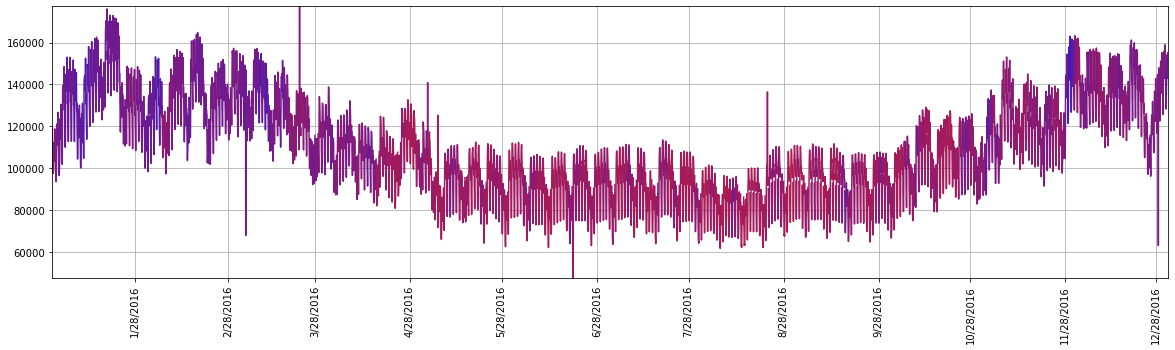

In [17]:
days = integrate_df.Date.unique()

max_temp, min_temp = integrate_df.temp.max(), integrate_df.temp.min()
green =0.1

plt.figure(figsize=(20,5))

for d in days:
    BM = integrate_df.Date == d
    wdf = integrate_df[BM]
    
    average_temp = wdf.temp.mean()
    red = (average_temp - min_temp)/ (max_temp - min_temp)
    blue = 1-red
    clr = [red,green,blue]
    plt.plot(wdf.index,wdf.Consumption,c = clr)
BM = (integrate_df.Hour =='0:00') & (integrate_df.Date.str.contains('/28/'))
plt.xticks(integrate_df[BM].index,integrate_df[BM].Date,rotation=90)
plt.grid()
plt.margins(y=0,x=0)
plt.show()

## Example 2 (Challenge 2 & 3)

In [18]:
athlete_df = pd.read_csv('table1.csv')
athlete_df

,Participant ID,Sex,Age,Weight (kg),Experience (years),Belt
0,P1,M,7,25,1,Green
1,P2,M,9,23,2,Red Stripe
2,P3,M,13,39,6,Black Stripe
3,P4,M,14,43,8,Black (Competitive)
4,P5,F,16,54,8,Black (Competitive)
5,P6,M,16,72,13,Black (Competitive)


In [19]:
unknown_df = pd.read_csv('Taekwondo_Technique_Classification_Stats.csv')
unknown_df

,Technique,R,R.1,R.2,R.3,R.4,R.5,R.6,R.7,R.8,...,P.20,P.21,P.22,P.23,P.24,P.25,P.26,P.27,P.28,P.29
0,ID,P1,P1,P1,P1,P1,P2,P2,P2,P2,...,P5,P5,P5,P5,P5,P6,P6,P6,P6,P6
1,Trial #,1,2,3,4,5,1,2,3,4,...,1,2,3,4,5,1,2,3,4,5
2,Readings,1026,1026,1026,1026,1026,1026,1026,1026,1026,...,1026,1026,1026,1026,1026,1026,1026,1026,1026,1026
3,NaN,1026,1028,1026,1027,1027,1026,1026,1026,1026,...,1026,1028,1026,1026,1025,1026,1026,1026,1026,1026
4,NaN,1026,1028,1026,1026,1027,1026,1026,1026,1026,...,1026,1028,1026,1026,1025,1025,1026,1026,1026,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
designed_columns = ['Participant_id','Gender','Age','Weight','Experience','Technique_id','Trial_number','Average_read']
n_rows = len(unknown_df.columns)-1
performance_df = pd.DataFrame(index=range(n_rows),columns =designed_columns)

In [21]:
performance_df

,Participant_id,Gender,Age,Weight,Experience,Technique_id,Trial_number,Average_read
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
athlete_df.set_index('Participant ID',inplace=True)
athlete_df.columns = ['Sex', 'Age', 'Weight', 'Experience', 'Belt']

In [23]:
techniques = ['R','B','C','P']
index = 0
for col in unknown_df.columns:
    if(col[0] in techniques):
        performance_df.loc[index,'Technique_id'] = col[0]
        performance_df.loc[index,'Trial_number'] = unknown_df[col][1]
        
        P_id = unknown_df[col][0]
        performance_df.loc[index,'Participant_id'] = P_id
        performance_df.loc[index,'Gender'] = athlete_df.loc[P_id].Sex
        performance_df.loc[index,'Age'] = athlete_df.loc[P_id].Age
        performance_df.loc[index,'Weight'] = athlete_df.loc[P_id].Weight
        performance_df.loc[
            index,'Experience'] = athlete_df.loc[P_id].Experience
        BM = unknown_df[col][2:].isna()
        performance_df.loc[
            index,'Average_read'] = unknown_df[
            col][2:][~BM].astype(int).mean()
        index +=1

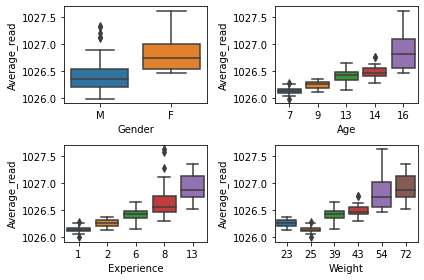

In [24]:
select_attributes = ['Gender','Age','Experience','Weight']
for i,att in enumerate(select_attributes):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = performance_df,
                y='Average_read', x=att)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Experience', ylabel='Average_read'>

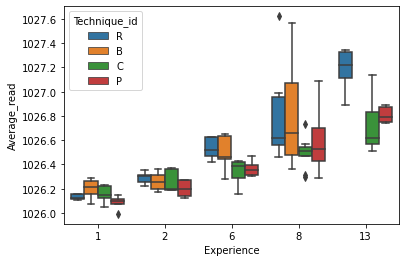

In [25]:
sns.boxplot(data = performance_df, y='Average_read', x='Experience',hue='Technique_id')

## Example 3 (Challenge 1, 3, 5 & 6)

## Checking for duplicate data objects

### Checking for duplicates in billboard_df

In [26]:
billboard_df = pd.read_csv('billboardHot100_1999-2019.csv')
wsr = billboard_df.apply(lambda r: '{}-{}-{}'
                         .format(r.Artists,r.Name,r.Week),axis=1)
wsr.value_counts()

50 Cent-Outta Control-2005-09-14                         2
Carly Rae Jepsen-Call Me Maybe-2012-04-13                1
High School Musical 2 Cast-What Time Is It-2007-08-29    1
Elle King-Ex's & Oh's-2015-10-09                         1
Billy Currington-Love Done Gone-2011-09-08               1
                                                        ..
Jack Ingram-Wherever You Are-2006-03-29                  1
Post Malone-Congratulations-2017-05-06                   1
Drake-All Me-2014-02-21                                  1
Blake Shelton-Doin' What She Likes-2014-05-23            1
Drake-Jaded-2018-07-21                                   1
Length: 97224, dtype: int64

In [27]:
billboard_df.query("Artists == '50 Cent' and Name=='Outta Control' \
                   and Week== '2005-09-14'")

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features
67588,67589,50 Cent,Outta Control,25,25.0,9.0,2005-09-14,"August 6, 2005","Remix,Rap","Mark batson, Mike elizondo, Havoc, Prodigy of ...","Outta Control Remix \nIt's the Infamous Mobb, ...",Mobb Deep
67647,67648,50 Cent,Outta Control,92,NaN,NaN,2005-09-14,"August 6, 2005","Remix,Rap","Mark batson, Mike elizondo, Havoc, Prodigy of ...","Outta Control Remix \nIt's the Infamous Mobb, ...",NaN


In [28]:
billboard_df.drop(index = 67647,inplace=True)

#### Checking for duplicates in songAttributes_df

In [29]:
songAttribute_df = pd.read_csv('songAttributes_1999-2019.csv')
wsr = songAttribute_df.apply(
    lambda r: '{}---{}'.format(r.Artist,r.Name),axis=1)
wsr.value_counts()

Jose Feliciano---Light My Fire                     21
Dave Matthews Band---Ants Marching - Live          18
Jose Feliciano---Rain                              15
Jose Feliciano---California Dreamin'               14
Jose Feliciano---La Bamba                          14
                                                   ..
Granger Smith---Miles and Mud Tires                 1
Linkin Park---The Requiem                           1
Guns N' Roses---Better                              1
Young The Giant---God Made Man - Live from SoHo     1
Robbie Williams---On The Fence                      1
Length: 131377, dtype: int64

In [30]:
songAttribute_df.query("Artist == 'Jose Feliciano' and Name == 'Light My Fire'")

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
143203,11,0.456,Encore! Jose Feliciano's Finest Performances (...,Jose Feliciano,0.569,374507,0.591,False,0.001030,0.678,-9.102,0,Light My Fire,3,0.0458,114.025,4,0.630
143275,83,0.454,Absolutely The Best: Jose Feliciano,Jose Feliciano,0.553,185986,0.470,False,0.000028,0.449,-16.280,0,Light My Fire,2,0.0427,109.038,4,0.770
143298,106,0.437,Affirmation,Jose Feliciano,0.558,188600,0.633,False,0.000011,0.402,-11.161,1,Light My Fire,1,0.0478,109.009,4,0.722
143314,122,0.513,Alive Alive - O!,Jose Feliciano,0.545,562613,0.741,False,0.000123,0.137,-9.925,0,Light My Fire,6,0.4350,113.729,4,0.368
143317,125,0.429,All Time Best: José Feliciano,Jose Feliciano,0.555,193601,0.480,False,0.000019,0.144,-15.814,0,Light My Fire,19,0.0439,109.104,4,0.723
143332,140,0.424,An Introduction To Jose Feliciano,Jose Feliciano,0.557,187693,0.654,False,0.000041,0.433,-10.036,0,Light My Fire,2,0.0444,109.127,4,0.785
143385,193,0.491,At His Best,Jose Feliciano,0.572,181347,0.704,False,0.000027,0.528,-8.031,1,Light My Fire,2,0.0460,109.086,4,0.729
143519,327,0.757,Collection,Jose Feliciano,0.464,217400,0.526,False,0.032200,0.301,-7.305,0,Light My Fire,17,0.0355,108.431,4,0.789
143640,448,0.497,In My Life,Jose Feliciano,0.549,186293,0.615,False,0.000093,0.554,-11.150,0,Light My Fire,1,0.0451,109.550,4,0.734
143649,457,0.500,Jose Feliciano - Latin American Legend,Jose Feliciano,0.556,186293,0.614,False,0.000032,0.642,-11.248,1,Light My Fire,0,0.0464,109.173,4,0.773


In [31]:
songAttribute_df.query("Artist == 'Dave Matthews Band' and Name == 'Ants Marching - Live'")

,Unnamed: 0,Acousticness,Album,Artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,Name,Popularity,Speechiness,Tempo,TimeSignature,Valence
101197,111,0.037700,Dave Matthews Band Live In Europe,Dave Matthews Band,0.450,561587,0.921,False,0.000861,0.966,-5.211,1,Ants Marching - Live,19,0.1370,115.461,4,0.463
101441,355,0.223000,Live Trax Vol. 10: Pavilion Atlantico,Dave Matthews Band,0.391,465720,0.963,False,0.003510,0.947,-4.769,1,Ants Marching - Live,25,0.1240,115.669,4,0.570
101463,377,0.019800,Live Trax Vol. 11: SPAC,Dave Matthews Band,0.428,472133,0.934,False,0.014700,0.682,-5.819,1,Ants Marching - Live,15,0.0636,108.322,4,0.492
101478,392,0.014000,Live Trax Vol. 12: L.B. Day Amphitheater,Dave Matthews Band,0.511,437613,0.918,False,0.079600,0.490,-5.182,1,Ants Marching - Live,11,0.0637,116.323,4,0.529
101496,410,0.046200,Live Trax Vol. 13: Busch Stadium,Dave Matthews Band,0.547,569467,0.948,False,0.007920,0.876,-4.202,1,Ants Marching - Live,15,0.0641,111.302,4,0.565
101513,427,0.001150,Live Trax Vol. 14: Nissan Pavilion,Dave Matthews Band,0.414,533107,0.900,False,0.372000,0.100,-6.186,1,Ants Marching - Live,17,0.0471,112.485,4,0.478
101537,451,0.011300,Live Trax Vol. 15: Alpine Valley Music Theatre,Dave Matthews Band,0.471,595840,0.915,False,0.014600,0.938,-6.672,1,Ants Marching - Live,16,0.1100,113.625,4,0.455
101574,488,0.049300,Live Trax Vol. 17: Shoreline Amphitheatre,Dave Matthews Band,0.528,461920,0.934,False,0.000060,0.962,-6.948,1,Ants Marching - Live,16,0.0611,115.231,4,0.631
101590,504,0.003590,Live Trax Vol. 18: Virginia Beach Amphitheatre,Dave Matthews Band,0.482,429373,0.974,False,0.020900,0.976,-6.307,1,Ants Marching - Live,19,0.1470,116.406,4,0.398
101604,518,0.000595,Live Trax Vol. 19: Vivo Rio,Dave Matthews Band,0.482,548166,0.937,False,0.067600,0.932,-6.352,1,Ants Marching - Live,29,0.0458,114.334,4,0.534


In [32]:
songAttribute_df = pd.read_csv('songAttributes_1999-2019.csv')
wsr = songAttribute_df.apply(
    lambda r: '{}---{}'.format(r.Name,r.Artist),axis=1)
doFrequencies = wsr.value_counts()

BM = doFrequencies>1

for i,v in doFrequencies[BM].iteritems():
    [name,artist] = i.split('---')
    BM = ((songAttribute_df.Name == name) &
          (songAttribute_df.Artist == artist))
    wdf = songAttribute_df[BM]
    
    dropping_index = wdf.index[1:]
    songAttribute_df.drop(index = dropping_index, 
                          inplace=True)

In [33]:
import time

In [34]:
songAttribute_df = pd.read_csv('songAttributes_1999-2019.csv')
wsr = songAttribute_df.apply(lambda r: '{}---{}'
                             .format(r.Name,r.Artist),axis=1)
doFrequencies = wsr.value_counts()

BM = doFrequencies>1
n_totalSongs = sum(BM)
print('Total processings: ' + str(n_totalSongs))

t = time.time()
i_progress = 0
for i,v in doFrequencies[BM].iteritems():
    [name,artist] = i.split('---')
    BM = ((songAttribute_df.Name == name) & 
          (songAttribute_df.Artist == artist))
    
    wdf = songAttribute_df[BM]
    dropping_index = wdf.index[1:]
    songAttribute_df.drop(index = dropping_index, inplace=True)
    
    i_progress +=1
    if(i_progress%500==0):
        print('Processed: ' + str(i_progress))
        process_time = time.time() - t
        print('Elapsed: ' + str(round(process_time,1)) + ' s')
        estimate_finish = round((n_totalSongs-i_progress) *
                                (process_time/500)/60,1)
        
        print('To finish: ' + str(estimate_finish)+ 'mins')
        t = time.time()
        print('------------------------------------')

Total processings: 17193
Processed: 500
Elapsed: 21.7 s
To finish: 12.1mins
------------------------------------
Processed: 1000
Elapsed: 20.9 s
To finish: 11.3mins
------------------------------------
Processed: 1500
Elapsed: 20.8 s
To finish: 10.9mins
------------------------------------
Processed: 2000
Elapsed: 20.6 s
To finish: 10.4mins
------------------------------------
Processed: 2500
Elapsed: 20.2 s
To finish: 9.9mins
------------------------------------
Processed: 3000
Elapsed: 20.4 s
To finish: 9.7mins
------------------------------------
Processed: 3500
Elapsed: 20.2 s
To finish: 9.2mins
------------------------------------
Processed: 4000
Elapsed: 21.1 s
To finish: 9.3mins
------------------------------------
Processed: 4500
Elapsed: 21.1 s
To finish: 8.9mins
------------------------------------
Processed: 5000
Elapsed: 21.1 s
To finish: 8.6mins
------------------------------------
Processed: 5500
Elapsed: 20.3 s
To finish: 7.9mins
------------------------------------
Proc

In [35]:
wsr = songAttribute_df.apply(lambda r: '{}---{}'
                             .format(r.Artist,r.Name),axis=1)
doFrequencies = wsr.value_counts()
doFrequencies

R. Kelly---Honey Love                 1
B.o.B---Fake Outro                    1
Cash Cash---The Great Speckle Bird    1
Jeezy---Spaceships on Bankhead        1
Mint Condition---Golddigger           1
                                     ..
Soulja Boy Tell 'em---Trap Spot       1
David Ball---I'm Walking The Dog      1
Mary Mary---Deep Inside               1
Aaron Tippin---Everything I Own       1
Robbie Williams---On The Fence        1
Length: 131377, dtype: int64

#### Checking for duplicates in artist_df

In [36]:
artist_df = pd.read_csv('artistDf.csv')
artist_df.Artist.value_counts()

Reba McEntire        2
Sean Kingston        1
Chris Cagle          1
Scarface             1
Cage The Elephant    1
                    ..
Gretchen Wilson      1
Jeannie Ortega       1
Young Thug           1
The Ready Set        1
Soulja Boy           1
Name: Artist, Length: 1034, dtype: int64

In [37]:
artist_df.query("Artist == 'Reba McEntire'")

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
398,398,Reba McEntire,974392,"contemporary country,country,country dawn",40,1977,F,Solo
716,716,Reba McEntire,974392,"contemporary country,country,country dawn",40,1977,F,Solo


In [38]:
artist_df.drop(index = 716, inplace=True)

### Design the structure for the end result of data integration 

In [39]:
songIntegrate_df = pd.DataFrame(
    columns = ['Name', 'Artists', 'Top_song', 'First_date_on_Billboard',
               'Acousticness', 'Danceability', 'Duration', 'Energy',
               'Explicit', 'Instrumentalness', 'Liveness', 'Loudness',
               'Mode', 'Speechiness', 'Tempo', 'TimeSignature', 'Valence',
               'Artists_n_followers', 'n_male_artists', 'n_female_artists',
               'n_bands', 'artist_average_years_after_first_album',
               'artist_average_number_albums'])
songIntegrate_df

,Name,Artists,Top_song,First_date_on_Billboard,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,...,Speechiness,Tempo,TimeSignature,Valence,Artists_n_followers,n_male_artists,n_female_artists,n_bands,artist_average_years_after_first_album,artist_average_number_albums


### Filling songIntegrate_df from billboard_df

In [40]:
SongNames = billboard_df.Name.unique()

for i, song in enumerate(SongNames):
    BM = billboard_df.Name == song
    wdf = billboard_df[BM]
    
    Artists = wdf.Artists.unique()
    for artist in Artists:
        BM = wdf.Artists == artist
        wdf2 = wdf[BM]
        
        topsong = False
        
        BM = wdf2['Weekly.rank'] <=10
        if(len(wdf2[BM])>=5):
            topsong = True
            
        first_date_on_billboard = wdf2.Week.iloc[-1]
        dic_append = {'Name':song,'Artists':artist,
                      'Top_song':topsong,
                      'First_date_on_Billboard': 
                      first_date_on_billboard}
        
        songIntegrate_df = songIntegrate_df.append(
            dic_append, ignore_index=True)

In [41]:
songIntegrate_df

,Name,Artists,Top_song,First_date_on_Billboard,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,...,Speechiness,Tempo,TimeSignature,Valence,Artists_n_followers,n_male_artists,n_female_artists,n_bands,artist_average_years_after_first_album,artist_average_number_albums
0,Old Town Road,"Lil Nas,",True,2019-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Senorita,"Shawn Mendes, Camila Cabello",False,2019-07-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Senorita,Justin Timberlake,False,2003-07-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bad Guy,Billie Eilish,True,2019-04-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talk,Khalid,True,2019-02-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,Praise You,Fatboy Slim,False,1999-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7209,Anyone Else,Collin Raye,False,1999-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7210,Nann,Trick Daddy,False,1999-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7211,She's Always Right,Clay Walker,False,1999-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling songIntegrate_df from songAttribute_df

In [42]:
adding_columns = ['Acousticness','Danceability','Duration','Energy','Explicit','Instrumentalness',
                  'Liveness','Loudness','Mode','Speechiness','Tempo','TimeSignature', 'Valence']
template = 'Index= {} - The song {} by {} was integrated using sitution {}.'
for i, row in songIntegrate_df.iterrows():
    filled = False
    Artists = row.Artists.split(',')
    Artists = list(map(str.strip,Artists))
    # Situation 1
    BM = songAttribute_df.Name == row.Name
    if(sum(BM) == 1):
        for col in adding_columns:
            songIntegrate_df.loc[i,col]= songAttribute_df[BM][col].values[0]
        filled = True
        print(template.format(i,row.Name,row.Artists,1))
    # Situation 2
    elif(sum(BM) > 1):
        wdf = songAttribute_df[BM]
        if(len(Artists)==1):
            BM2 = wdf.Artist.str.contains(Artists[0])
            if(sum(BM2)==1):
                for col in adding_columns:
                    songIntegrate_df.loc[i,col]= wdf[BM2][col].values[0]
                filled = True
                print(template.format(i,row.Name,row.Artists,2))
    # Situation 3
    if((not filled) and len(Artists)>1):
        BM2= (songAttribute_df.Name.str.contains(row.Name)&songAttribute_df.Artist.isin(Artists))
        if(sum(BM2)==1):
            for col in adding_columns:
                songIntegrate_df.loc[i,col]= songAttribute_df[BM2][col].values[0]
            filled = True
            print(template.format(i,row.Name,row.Artists,3))
    if(not filled):
        # Situation 4
        BM2 = songAttribute_df.Name.str.contains(row.Name)
        if(sum(BM2)==1):
            for artist in Artists:
                if(artist == songAttribute_df[BM2].Artist.iloc[0]):
                    for col in adding_columns:
                        songIntegrate_df.loc[i,col]= songAttribute_df[BM2][col].values[0]
                    filled = True
                    print(template.format(i,row.Name,row.Artists,4))        
        # Situation 5
        if(sum(BM2)>1):
            wdf2 = songAttribute_df[BM2]
            BM3 = wdf2.Artist.isin(Artists)
            if(sum(BM3)>0):
                wdf3 = wdf2[BM3]
                for i3, row3 in wdf3.iterrows():
                    if(row3.Name == row.Name):
                        for col in adding_columns:
                            songIntegrate_df.loc[i,col]= row3[col]
                        filled = True
                        print(template.format(i,row.Name,row.Artists,5))

Index= 6 - The song I Don't Care by Ed Sheeran, Justin Bieber was integrated using sitution 3.
Index= 8 - The song I Don't Care by Fall Out Boy was integrated using sitution 2.
Index= 9 - The song Sucker by Jonas Brothers was integrated using sitution 2.
Index= 12 - The song No Guidance by Chris Brown was integrated using sitution 4.
Index= 14 - The song Truth Hurts by Lizzo was integrated using sitution 1.
Index= 16 - The song You Need To Calm Down by Taylor Swift was integrated using sitution 1.
Index= 21 - The song Without Me by Fantasia was integrated using sitution 2.
Index= 22 - The song Without Me by Eminem was integrated using sitution 2.
Index= 28 - The song Rodeo by Juvenile was integrated using sitution 2.
Index= 30 - The song Hey Look Ma, I Made It by Panic! At The Disco was integrated using sitution 1.
Index= 31 - The song Happier by Marshmello, Bastille was integrated using sitution 1.
Index= 32 - The song Happier by Ed Sheeran was integrated using sitution 1.
Index= 33 -

Index= 392 - The song Dangerous by Kardinal Offishall was integrated using sitution 2.
Index= 393 - The song Dangerous by Ying Yang Twins was integrated using sitution 2.
Index= 396 - The song All I Want For Christmas Is You by Mariah Carey was integrated using sitution 2.
Index= 398 - The song Jingle Bell Rock by Bobby Helms was integrated using sitution 2.
Index= 399 - The song Rockin' Around The Christmas Tree by Brenda Lee was integrated using sitution 2.
Index= 403 - The song The Christmas Song by Christina Aguilera was integrated using sitution 2.
Index= 410 - The song Here Comes Santa Claus by Gene Autry was integrated using sitution 2.
Index= 411 - The song Feliz Navidad by Jose Feliciano was integrated using sitution 2.
Index= 413 - The song White Christmas by Bing Crosby was integrated using sitution 2.
Index= 414 - The song Blue Christmas by Elvis Presley was integrated using sitution 2.
Index= 415 - The song Christmas by Darlene Love was integrated using sitution 1.
Index= 

Index= 642 - The song Good Guy by Eminem was integrated using sitution 1.
Index= 650 - The song Never Be The Same by Camila Cabello was integrated using sitution 1.
Index= 651 - The song One Kiss by Calvin Harris, Dua Lipa was integrated using sitution 1.
Index= 652 - The song Moonlight by XXXTENTACION was integrated using sitution 1.
Index= 653 - The song Moonlight by JAY was integrated using sitution 1.
Index= 654 - The song Get Along by Kenny Chesney was integrated using sitution 2.
Index= 658 - The song Level Up by Ciara was integrated using sitution 1.
Index= 660 - The song Don't Go Breaking My Heart by Backstreet Boys was integrated using sitution 2.
Index= 662 - The song Mob Ties by Drake was integrated using sitution 1.
Index= 664 - The song Wasted by Tiesto was integrated using sitution 2.
Index= 666 - The song Wasted by Carrie Underwood was integrated using sitution 2.
Index= 671 - The song Everytime by Britney Spears was integrated using sitution 2.
Index= 678 - The song Bed

Index= 938 - The song Five More Minutes by Scotty McCreery was integrated using sitution 1.
Index= 941 - The song Tell Me You Love Me by Demi Lovato was integrated using sitution 2.
Index= 945 - The song All On Me by Devin Dawson was integrated using sitution 1.
Index= 950 - The song Lemon by N*E*R*D, Rihanna was integrated using sitution 1.
Index= 951 - The song Privilege by The Weeknd was integrated using sitution 1.
Index= 954 - The song Tempo by Chris Brown was integrated using sitution 2.
Index= 959 - The song Beautiful Trauma by P!nk was integrated using sitution 1.
Index= 967 - The song MotorSport by Migos, Nicki Minaj, Cardi B was integrated using sitution 1.
Index= 978 - The song Sky Walker by Miguel was integrated using sitution 1.
Index= 984 - The song Everybody Hates Me by The Chainsmokers was integrated using sitution 1.
Index= 986 - The song Sorry Not Sorry by Demi Lovato was integrated using sitution 1.
Index= 987 - The song Sorry Not Sorry by Bryson Tiller was integrate

Index= 1255 - The song Slippery by Migos was integrated using sitution 4.
Index= 1257 - The song Malibu by Miley Cyrus was integrated using sitution 2.
Index= 1262 - The song El Amante by Nicky Jam was integrated using sitution 2.
Index= 1264 - The song Issues by Meek Mill was integrated using sitution 2.
Index= 1265 - The song OMG by Camila Cabello was integrated using sitution 1.
Index= 1266 - The song OMG by Usher was integrated using sitution 1.
Index= 1268 - The song What's My Name by DMX was integrated using sitution 2.
Index= 1271 - The song Rolex by Ayo, Teo was integrated using sitution 1.
Index= 1272 - The song Passionfruit by Drake was integrated using sitution 1.
Index= 1276 - The song Heavy by Collective Soul was integrated using sitution 2.
Index= 1279 - The song Signs by Snoop Dogg was integrated using sitution 2.
Index= 1280 - The song In The End by Linkin Park was integrated using sitution 2.
Index= 1282 - The song Closer by Tegan And Sara was integrated using sitution

Index= 1493 - The song Hearts Don't Break Around Here by Ed Sheeran was integrated using sitution 1.
Index= 1494 - The song Barcelona by Ed Sheeran was integrated using sitution 2.
Index= 1499 - The song Love by Lana Del Rey was integrated using sitution 2.
Index= 1500 - The song Love by Keyshia Cole was integrated using sitution 2.
Index= 1501 - The song Love by Musiq Soulchild was integrated using sitution 2.
Index= 1504 - The song Love Me Now by John Legend was integrated using sitution 2.
Index= 1512 - The song No Favors by Big Sean was integrated using sitution 2.
Index= 1513 - The song Zoom by Future was integrated using sitution 1.
Index= 1514 - The song Zoom by Lil' Boosie was integrated using sitution 1.
Index= 1523 - The song Sex With Me by Rihanna was integrated using sitution 1.
Index= 1525 - The song Cheap Thrills by Sia was integrated using sitution 1.
Index= 1527 - The song The Greatest by Sia was integrated using sitution 2.
Index= 1528 - The song Bad Romance by Lady Ga

Index= 1744 - The song Hit Or Miss by Jacob Sartorius was integrated using sitution 1.
Index= 1746 - The song Toothbrush by DNCE was integrated using sitution 1.
Index= 1748 - The song Castaway by Zac Brown Band was integrated using sitution 2.
Index= 1749 - The song No Money by Galantis was integrated using sitution 1.
Index= 1750 - The song Wasted Time by Keith Urban was integrated using sitution 2.
Index= 1755 - The song Let It Go by Tim McGraw was integrated using sitution 2.
Index= 1756 - The song Let It Go by Keyshia Cole was integrated using sitution 2.
Index= 1758 - The song All The Way Up by Fat Joe, Remy Ma, Jay Z was integrated using sitution 5.
Index= 1758 - The song All The Way Up by Fat Joe, Remy Ma, Jay Z was integrated using sitution 5.
Index= 1760 - The song My House by Flo Rida was integrated using sitution 2.
Index= 1763 - The song Holy Key by DJ Khaled was integrated using sitution 4.
Index= 1764 - The song Brand New by Ben Rector was integrated using sitution 2.
In

Index= 1944 - The song Walking On A Dream by Empire Of The Sun was integrated using sitution 1.
Index= 1946 - The song Wildest Dreams by Taylor Swift was integrated using sitution 2.
Index= 1948 - The song Out Of The Woods by Taylor Swift was integrated using sitution 1.
Index= 1953 - The song On My Mind by Ellie Goulding was integrated using sitution 2.
Index= 1954 - The song Confident by Demi Lovato was integrated using sitution 2.
Index= 1955 - The song Confident by Justin Bieber was integrated using sitution 2.
Index= 1957 - The song All I Ask by Adele was integrated using sitution 1.
Index= 1960 - The song Irresistible by Fall Out Boy was integrated using sitution 2.
Index= 1961 - The song Irresistible by Jessica Simpson was integrated using sitution 2.
Index= 1962 - The song Do It Like Me by DLOW was integrated using sitution 1.
Index= 1969 - The song The Fix by Nelly was integrated using sitution 1.
Index= 1970 - The song No Role Modelz by J. Cole was integrated using sitution 2

Index= 2179 - The song Bright by Echosmith was integrated using sitution 1.
Index= 2184 - The song Baby Be My Love Song by Easton Corbin was integrated using sitution 1.
Index= 2188 - The song Dance Like We're Making Love by Ciara was integrated using sitution 1.
Index= 2191 - The song Somebody by Reba McEntire was integrated using sitution 2.
Index= 2192 - The song Style by Taylor Swift was integrated using sitution 2.
Index= 2193 - The song Don't It by Billy Currington was integrated using sitution 2.
Index= 2194 - The song Little Toy Guns by Carrie Underwood was integrated using sitution 1.
Index= 2195 - The song I Really Like You by Carly Rae Jepsen was integrated using sitution 2.
Index= 2198 - The song Hood Go Crazy by Tech N9Ne was integrated using sitution 1.
Index= 2202 - The song Brother by NEEDTOBREATHE was integrated using sitution 2.
Index= 2204 - The song Blank Space by Taylor Swift was integrated using sitution 1.
Index= 2205 - The song Blank Space by I Prevail was integ

Index= 2384 - The song Neon Light by Blake Shelton was integrated using sitution 1.
Index= 2385 - The song Trumpets by Jason Derulo was integrated using sitution 1.
Index= 2386 - The song Anaconda by Nicki Minaj was integrated using sitution 1.
Index= 2388 - The song Try by Colbie Caillat was integrated using sitution 2.
Index= 2389 - The song Try by P!nk was integrated using sitution 2.
Index= 2391 - The song In Your Arms by Nico, Vinz was integrated using sitution 1.
Index= 2392 - The song Bed Of Lies by Nicki Minaj was integrated using sitution 1.
Index= 2395 - The song Burnin' Up by Jessie J was integrated using sitution 2.
Index= 2396 - The song Burnin' Up by Jonas Brothers was integrated using sitution 2.
Index= 2398 - The song Shell Shocked by Juicy J, Wiz Khalifa, Ty Dolla $ign was integrated using sitution 1.
Index= 2402 - The song Velvet by Chris Jamison was integrated using sitution 1.
Index= 2407 - The song Get On Your Knees by Nicki Minaj was integrated using sitution 1.
I

Index= 2589 - The song Ultraviolence by Lana Del Rey was integrated using sitution 1.
Index= 2590 - The song Red Lights by Tiesto was integrated using sitution 1.
Index= 2594 - The song Magic by Robin Thicke was integrated using sitution 2.
Index= 2597 - The song Rewind by Rascal Flatts was integrated using sitution 2.
Index= 2599 - The song Shades Of Cool by Lana Del Rey was integrated using sitution 1.
Index= 2600 - The song Cop Car by Keith Urban was integrated using sitution 1.
Index= 2605 - The song Part II by Jay Z was integrated using sitution 1.
Index= 2606 - The song Part II by Method Man, Redman was integrated using sitution 1.
Index= 2608 - The song Billie Jean by Michael Jackson was integrated using sitution 2.
Index= 2610 - The song Let Her Go by Passenger was integrated using sitution 2.
Index= 2616 - The song Headlights by Eminem was integrated using sitution 2.
Index= 2617 - The song The Monster by Eminem was integrated using sitution 1.
Index= 2619 - The song The Walke

Index= 2776 - The song We Can't Stop by Miley Cyrus was integrated using sitution 1.
Index= 2777 - The song Mirrors by Justin Timberlake was integrated using sitution 2.
Index= 2778 - The song Red by Taylor Swift was integrated using sitution 2.
Index= 2781 - The song Aw Naw by Chris Young was integrated using sitution 1.
Index= 2784 - The song Only Time by Enya was integrated using sitution 2.
Index= 2785 - The song PYD by Justin Bieber was integrated using sitution 1.
Index= 2789 - The song Livin' On A Prayer by Bon Jovi was integrated using sitution 1.
Index= 2790 - The song All Bad by Justin Bieber was integrated using sitution 2.
Index= 2791 - The song Everything Has Changed by Taylor Swift was integrated using sitution 1.
Index= 2792 - The song Dope by Lady Gaga was integrated using sitution 2.
Index= 2799 - The song Bad Day by Justin Bieber was integrated using sitution 2.
Index= 2801 - The song Bad Day by Daniel Powter was integrated using sitution 2.
Index= 2802 - The song Bad

Index= 2953 - The song Bugatti by Ace Hood was integrated using sitution 1.
Index= 2956 - The song I Knew You Were Trouble. by Taylor Swift was integrated using sitution 1.
Index= 2959 - The song Paper Doll by John Mayer was integrated using sitution 2.
Index= 2964 - The song Who I Am by Jessica Andrews was integrated using sitution 2.
Index= 2967 - The song Loveeeeeee Song by Rihanna was integrated using sitution 1.
Index= 2970 - The song Mama's Broken Heart by Miranda Lambert was integrated using sitution 1.
Index= 2971 - The song Levitate by Hadouken! was integrated using sitution 1.
Index= 2972 - The song Love And War by Tamar Braxton was integrated using sitution 1.
Index= 2973 - The song Pirate Flag by Kenny Chesney was integrated using sitution 1.
Index= 2975 - The song Can't Shake You by Gloriana was integrated using sitution 1.
Index= 2977 - The song Troublemaker by Akon was integrated using sitution 2.
Index= 2978 - The song Wit Me by T.I. was integrated using sitution 2.
Ind

Index= 3113 - The song Don't Wake Me Up by Chris Brown was integrated using sitution 1.
Index= 3114 - The song Kiss Tomorrow Goodbye by Luke Bryan was integrated using sitution 1.
Index= 3115 - The song El Cerrito Place by Kenny Chesney was integrated using sitution 1.
Index= 3120 - The song King Wizard by Kid Cudi was integrated using sitution 1.
Index= 3123 - The song Birthday Song by 2 Chainz was integrated using sitution 1.
Index= 3125 - The song The One That Got Away by Jake Owen was integrated using sitution 2.
Index= 3126 - The song The One That Got Away by Katy Perry was integrated using sitution 2.
Index= 3129 - The song My Life by The Game was integrated using sitution 2.
Index= 3130 - The song Finally Found You by Enrique Iglesias was integrated using sitution 1.
Index= 3131 - The song Everybody Talks by Neon Trees was integrated using sitution 1.
Index= 3132 - The song Good Time by Owl City, Carly Rae Jepsen was integrated using sitution 5.
Index= 3132 - The song Good Time 

Index= 3254 - The song Beers Ago by Toby Keith was integrated using sitution 1.
Index= 3255 - The song Runaways by The Killers was integrated using sitution 2.
Index= 3257 - The song Go Get It by T.I. was integrated using sitution 2.
Index= 3258 - The song HYFR by Drake was integrated using sitution 4.
Index= 3261 - The song How We Do by The Game was integrated using sitution 2.
Index= 3262 - The song Midnight City by M83. was integrated using sitution 1.
Index= 3263 - The song Part Of Me by Katy Perry was integrated using sitution 2.
Index= 3264 - The song The Motto by Drake was integrated using sitution 2.
Index= 3265 - The song Get It Started by Pitbull was integrated using sitution 2.
Index= 3266 - The song Right By My Side by Nicki Minaj was integrated using sitution 1.
Index= 3267 - The song Drank In My Cup by Kirko Bangz was integrated using sitution 1.
Index= 3268 - The song Take Care by Drake was integrated using sitution 2.
Index= 3269 - The song Climax by Usher was integrate

Index= 3406 - The song Stupid Hoe by Nicki Minaj was integrated using sitution 1.
Index= 3408 - The song Raise Your Weapon by deadmau5 was integrated using sitution 1.
Index= 3409 - The song All Your Life by The Band Perry was integrated using sitution 1.
Index= 3410 - The song Mr. Know It All by Kelly Clarkson was integrated using sitution 1.
Index= 3412 - The song 5 O'Clock by T was integrated using sitution 1.
Index= 3413 - The song Strange Clouds by B.o.B was integrated using sitution 1.
Index= 3416 - The song La Isla Bonita by Glee Cast was integrated using sitution 1.
Index= 3417 - The song Brighter Than The Sun by Colbie Caillat was integrated using sitution 1.
Index= 3418 - The song Give Me Everything by Pitbull was integrated using sitution 1.
Index= 3422 - The song Wanna Be Startin' Somethin' by Glee Cast was integrated using sitution 1.
Index= 3425 - The song Bait A Hook by Justin Moore was integrated using sitution 1.
Index= 3426 - The song Storm Warning by Hunter Hayes was

Index= 3549 - The song Still Got It by Tyga was integrated using sitution 1.
Index= 3550 - The song Papi by Jennifer Lopez was integrated using sitution 1.
Index= 3551 - The song Lost In Paradise by Evanescence was integrated using sitution 2.
Index= 3552 - The song Faster by Matt Nathanson was integrated using sitution 2.
Index= 3553 - The song Barefoot Blue Jean Night by Jake Owen was integrated using sitution 1.
Index= 3558 - The song You And Tequila by Kenny Chesney was integrated using sitution 4.
Index= 3559 - The song Run The World by Glee Cast was integrated using sitution 1.
Index= 3560 - The song Run The World by Beyonce was integrated using sitution 1.
Index= 3561 - The song Love Don't Run by Steve Holy was integrated using sitution 1.
Index= 3562 - The song No Sleep by Wiz Khalifa was integrated using sitution 2.
Index= 3563 - The song Motivation by Kelly Rowland was integrated using sitution 2.
Index= 3566 - The song After Midnight by Blink was integrated using sitution 2.

Index= 3701 - The song Bang Bang Bang by Selena Gomez, The Scene was integrated using sitution 3.
Index= 3703 - The song Teenage Daughters by Martina McBride was integrated using sitution 1.
Index= 3704 - The song Grenade by Bruno Mars was integrated using sitution 2.
Index= 3705 - The song Like My Mother Does by Lauren Alaina was integrated using sitution 1.
Index= 3706 - The song Colder Weather by Zac Brown Band was integrated using sitution 1.
Index= 3707 - The song Danza Kuduro by Don Omar, Lucenzo was integrated using sitution 1.
Index= 3710 - The song Light Up The World by Glee Cast was integrated using sitution 4.
Index= 3711 - The song Pretending by Glee Cast was integrated using sitution 4.
Index= 3717 - The song As Long As You're There by Glee Cast was integrated using sitution 4.
Index= 3718 - The song Rope by Foo Fighters was integrated using sitution 1.
Index= 3719 - The song Hair by Lady Gaga was integrated using sitution 2.
Index= 3720 - The song Moment 4 Life by Nicki M

Index= 3876 - The song Please Don't Go by Mike Posner was integrated using sitution 2.
Index= 3877 - The song Please Don't Go by Tank was integrated using sitution 2.
Index= 3878 - The song When You're Young by 3 Doors Down was integrated using sitution 1.
Index= 3879 - The song The Creep by The Lonely Island was integrated using sitution 1.
Index= 3882 - The song Right Thru Me by Nicki Minaj was integrated using sitution 1.
Index= 3884 - The song Fire Flame by Birdman was integrated using sitution 1.
Index= 3885 - The song Right Above It by Lil Wayne was integrated using sitution 2.
Index= 3886 - The song Dog Days Are Over by Florence + The Machine was integrated using sitution 1.
Index= 3887 - The song Dog Days Are Over by Glee Cast was integrated using sitution 1.
Index= 3888 - The song Can't Be Friends by Trey Songz was integrated using sitution 1.
Index= 3891 - The song Help Is On The Way by Rise Against was integrated using sitution 1.
Index= 3892 - The song Mama's Song by Carrie

Index= 4016 - The song Papa Can You Hear Me? by Glee Cast was integrated using sitution 4.
Index= 4017 - The song I Look To You by Glee Cast was integrated using sitution 4.
Index= 4020 - The song Like We Used To by A Rocket To The Moon was integrated using sitution 1.
Index= 4022 - The song Toxic by Britney Spears was integrated using sitution 2.
Index= 4025 - The song What's Wrong With Them by Lil Wayne was integrated using sitution 2.
Index= 4026 - The song I'm A Slave 4 U by Glee Cast was integrated using sitution 4.
Index= 4030 - The song Stronger by Britney Spears was integrated using sitution 2.
Index= 4032 - The song Me Against The Music by Glee Cast was integrated using sitution 4.
Index= 4034 - The song I Am Not A Human Being by Lil Wayne was integrated using sitution 2.
Index= 4035 - The song Bill Gates by Lil Wayne was integrated using sitution 2.
Index= 4038 - The song Hope She Cheats On You by Marsha Ambrosius was integrated using sitution 4.
Index= 4041 - The song Pretty

Index= 4172 - The song Super High by Rick Ross was integrated using sitution 2.
Index= 4174 - The song Safety Dance by Glee Cast was integrated using sitution 1.
Index= 4177 - The song Blah Blah Blah by Ke$ha was integrated using sitution 1.
Index= 4179 - The song A Little More Country Than That by Easton Corbin was integrated using sitution 1.
Index= 4181 - The song Window Seat by Erykah Badu was integrated using sitution 2.
Index= 4182 - The song Backwoods by Justin Moore was integrated using sitution 2.
Index= 4183 - The song Naturally by Selena Gomez, The Scene was integrated using sitution 5.
Index= 4185 - The song Live Like We're Dying by Kris Allen was integrated using sitution 1.
Index= 4186 - The song Total Eclipse Of The Heart by Glee Cast was integrated using sitution 4.
Index= 4187 - The song Drop The World by Lil Wayne was integrated using sitution 2.
Index= 4190 - The song I'm Single by Lil Wayne was integrated using sitution 2.
Index= 4191 - The song Rose's Turn by Glee 

Index= 4326 - The song Give It Up To Me by Shakira was integrated using sitution 1.
Index= 4327 - The song Give It Up To Me by Sean Paul was integrated using sitution 1.
Index= 4328 - The song Russian Roulette by Rihanna was integrated using sitution 2.
Index= 4329 - The song Ready To Love Again by Lady Antebellum was integrated using sitution 1.
Index= 4330 - The song Do I by Luke Bryan was integrated using sitution 1.
Index= 4331 - The song I Will Not Bow by Breaking Benjamin was integrated using sitution 1.
Index= 4332 - The song Hot Mess by Cobra Starship was integrated using sitution 2.
Index= 4333 - The song One Time by Justin Bieber was integrated using sitution 2.
Index= 4334 - The song Red Light by David Nail was integrated using sitution 2.
Index= 4335 - The song Love This Pain by Lady Antebellum was integrated using sitution 1.
Index= 4338 - The song Funhouse by P!nk was integrated using sitution 1.
Index= 4340 - The song Gettin' You Home by Chris Young was integrated using 

Index= 4464 - The song Take A Bow by Rihanna was integrated using sitution 1.
Index= 4465 - The song People Are Crazy by Billy Currington was integrated using sitution 1.
Index= 4466 - The song Barefoot And Crazy by Jack Ingram was integrated using sitution 1.
Index= 4467 - The song Send It On by Disney's Friends For Change was integrated using sitution 1.
Index= 4468 - The song She Is Love by Parachute was integrated using sitution 2.
Index= 4470 - The song Wetter by Twista was integrated using sitution 2.
Index= 4471 - The song Joey by Sugarland was integrated using sitution 2.
Index= 4472 - The song It's A Business Doing Pleasure With You by Tim McGraw was integrated using sitution 1.
Index= 4473 - The song Second Chance by Shinedown was integrated using sitution 2.
Index= 4475 - The song I Need A Girl by Trey Songz was integrated using sitution 1.
Index= 4476 - The song I Need A Girl by P. Diddy was integrated using sitution 1.
Index= 4477 - The song Million Dollar Bill by Whitney 

Index= 4604 - The song Panic Switch by Silversun Pickups was integrated using sitution 1.
Index= 4605 - The song It's Alright, It's OK by Ashley Tisdale was integrated using sitution 1.
Index= 4606 - The song White Horse by Taylor Swift was integrated using sitution 2.
Index= 4608 - The song Untouched by The Veronicas was integrated using sitution 1.
Index= 4609 - The song You Complete Me by Keyshia Cole was integrated using sitution 2.
Index= 4612 - The song Marry For Money by Trace Adkins was integrated using sitution 1.
Index= 4613 - The song Just Like Me by Jamie Foxx was integrated using sitution 2.
Index= 4615 - The song Gotta Be Somebody by Nickelback was integrated using sitution 2.
Index= 4616 - The song God Love Her by Toby Keith was integrated using sitution 1.
Index= 4618 - The song Lifeline by Papa Roach was integrated using sitution 2.
Index= 4619 - The song Hot Revolver by Lil Wayne was integrated using sitution 2.
Index= 4620 - The song Down The Road by Kenny Chesney Wi

Index= 4743 - The song Angels by David Archuleta was integrated using sitution 2.
Index= 4744 - The song Angels by Robbie Williams was integrated using sitution 2.
Index= 4745 - The song It's Over by Jesse McCartney was integrated using sitution 2.
Index= 4746 - The song Country Man by Luke Bryan was integrated using sitution 2.
Index= 4747 - The song The Day That Never Comes by Metallica was integrated using sitution 1.
Index= 4749 - The song Cuddy Buddy by Mike Jones was integrated using sitution 4.
Index= 4750 - The song Can I Have This Dance by Zac Efron, Vanessa Hudgens was integrated using sitution 1.
Index= 4751 - The song Shake It by Metro Station was integrated using sitution 2.
Index= 4752 - The song Body On Me by Nelly was integrated using sitution 1.
Index= 4755 - The song Put On by Young Jeezy was integrated using sitution 1.
Index= 4756 - The song Cry For You by September was integrated using sitution 1.
Index= 4758 - The song Be OK by Ingrid Michaelson was integrated usi

Index= 4886 - The song Our Song by Taylor Swift was integrated using sitution 2.
Index= 4888 - The song What Kinda Gone by Chris Cagle was integrated using sitution 1.
Index= 4889 - The song Love Is Gone by David Guetta, Chris Willis was integrated using sitution 1.
Index= 4890 - The song Always Be My Baby by David Cook was integrated using sitution 1.
Index= 4892 - The song Bubbly by Colbie Caillat was integrated using sitution 2.
Index= 4893 - The song Paralyzer by Finger Eleven was integrated using sitution 1.
Index= 4894 - The song All by American Girl was integrated using sitution 1.
Index= 4896 - The song No Matter What by T.I. was integrated using sitution 2.
Index= 4898 - The song Small Town Southern Man by Alan Jackson was integrated using sitution 1.
Index= 4899 - The song When You Look Me In The Eyes by Jonas Brothers was integrated using sitution 1.
Index= 4900 - The song Stronger Woman by Jewel was integrated using sitution 1.
Index= 4901 - The song Falsetto by The was int

Index= 5031 - The song More Than A Memory by Garth Brooks was integrated using sitution 1.
Index= 5032 - The song Free And Easy by Dierks Bentley was integrated using sitution 4.
Index= 5033 - The song Hood Figga by Gorilla Zoe was integrated using sitution 1.
Index= 5034 - The song Take Me There by Rascal Flatts was integrated using sitution 1.
Index= 5035 - The song If You're Reading This by Tim McGraw was integrated using sitution 1.
Index= 5036 - The song Online by Brad Paisley was integrated using sitution 1.
Index= 5038 - The song Umbrella by Rihanna was integrated using sitution 1.
Index= 5039 - The song Hey There Delilah by Plain White T's was integrated using sitution 1.
Index= 5040 - The song Sorry, Blame It On Me by Akon was integrated using sitution 1.
Index= 5041 - The song Do It Well by Jennifer Lopez was integrated using sitution 2.
Index= 5042 - The song The Hand Clap by Hurricane Chris was integrated using sitution 4.
Index= 5044 - The song I Get Money by 50 Cent was i

Index= 5163 - The song It's Not Over by Daughtry was integrated using sitution 2.
Index= 5164 - The song Last Dollar by Tim McGraw was integrated using sitution 4.
Index= 5165 - The song Say It Right by Nelly Furtado was integrated using sitution 1.
Index= 5166 - The song Face Down by The Red Jumpsuit Apparatus was integrated using sitution 2.
Index= 5167 - The song Beautiful Flower by India.Arie was integrated using sitution 2.
Index= 5169 - The song This Ain't A Scene, It's An Arms Race by Fall Out Boy was integrated using sitution 1.
Index= 5171 - The song Straight To The Bank by 50 Cent was integrated using sitution 1.
Index= 5172 - The song Candyman by Christina Aguilera was integrated using sitution 2.
Index= 5173 - The song Don't Make Me by Blake Shelton was integrated using sitution 2.
Index= 5174 - The song Lost Without U by Robin Thicke was integrated using sitution 2.
Index= 5176 - The song Anyway by Martina McBride was integrated using sitution 2.
Index= 5177 - The song Ove

Index= 5304 - The song Call Me When You're Sober by Evanescence was integrated using sitution 1.
Index= 5305 - The song Here It Goes Again by OK Go was integrated using sitution 1.
Index= 5308 - The song You Don't Know by Eminem, 50 Cent, Lloyd Banks, Ca$his was integrated using sitution 3.
Index= 5310 - The song Love Like Winter by AFI was integrated using sitution 1.
Index= 5311 - The song Mr. Jones by Mike Jones was integrated using sitution 2.
Index= 5312 - The song Ay Chico by Pitbull was integrated using sitution 4.
Index= 5313 - The song You Save Me by Kenny Chesney was integrated using sitution 1.
Index= 5315 - The song Some People Change by Montgomery Gentry was integrated using sitution 2.
Index= 5316 - The song Love Me Or Hate Me by Lady Sovereign was integrated using sitution 1.
Index= 5317 - The song Tell Me Baby by Red Hot Chili Peppers was integrated using sitution 1.
Index= 5318 - The song Show Stopper by Danity Kane was integrated using sitution 1.
Index= 5319 - The so

Index= 5459 - The song What You Know by T.I. was integrated using sitution 2.
Index= 5460 - The song Single by Natasha Bedingfield was integrated using sitution 2.
Index= 5461 - The song The Adventure by Angels, Airwaves was integrated using sitution 5.
Index= 5461 - The song The Adventure by Angels, Airwaves was integrated using sitution 5.
Index= 5462 - The song Settle For A Slowdown by Dierks Bentley was integrated using sitution 1.
Index= 5464 - The song Can't Let Go by Anthony Hamilton was integrated using sitution 2.
Index= 5466 - The song Who Says You Can't Go Home by Bon Jovi was integrated using sitution 1.
Index= 5467 - The song My Destiny by Katharine McPhee was integrated using sitution 1.
Index= 5468 - The song Don't Wait by Dashboard Confessional was integrated using sitution 1.
Index= 5470 - The song Angelito by Don Omar was integrated using sitution 2.
Index= 5471 - The song Something's Gotta Give by LeAnn Rimes was integrated using sitution 2.
Index= 5472 - The song Sa

Index= 5606 - The song We Belong Together by Mariah Carey was integrated using sitution 2.
Index= 5607 - The song Soul Meets Body by Death Cab For Cutie was integrated using sitution 1.
Index= 5609 - The song I Should Have Cheated by Keyshia Cole was integrated using sitution 1.
Index= 5610 - The song Beverly Hills by Weezer was integrated using sitution 1.
Index= 5613 - The song Come A Little Closer by Dierks Bentley was integrated using sitution 1.
Index= 5615 - The song Twisted Transistor by Korn was integrated using sitution 1.
Index= 5616 - The song Have A Nice Day by Bon Jovi was integrated using sitution 1.
Index= 5617 - The song Miss Me Baby by Chris Cagle was integrated using sitution 1.
Index= 5618 - The song Who You'd Be Today by Kenny Chesney was integrated using sitution 1.
Index= 5619 - The song DOA by Foo Fighters was integrated using sitution 1.
Index= 5623 - The song Window Shopper by 50 Cent was integrated using sitution 1.
Index= 5624 - The song Seasons Of Love by Ca

Index= 5746 - The song ASAP by T.I. was integrated using sitution 1.
Index= 5748 - The song My Sister by Reba McEntire was integrated using sitution 2.
Index= 5749 - The song Touch by Omarion was integrated using sitution 2.
Index= 5750 - The song Ass Like That by Eminem was integrated using sitution 2.
Index= 5751 - The song Sgt. Pepper's Lonely Hearts Club Band by Paul McCartney With U2 was integrated using sitution 1.
Index= 5753 - The song If Something Should Happen by Darryl Worley was integrated using sitution 1.
Index= 5754 - The song American Baby by Dave Matthews Band was integrated using sitution 1.
Index= 5755 - The song I'm A Hustla by Cassidy was integrated using sitution 1.
Index= 5757 - The song Be Yourself by Audioslave was integrated using sitution 2.
Index= 5758 - The song Hate It Or Love It by The Game was integrated using sitution 2.
Index= 5759 - The song The Talkin' Song Repair Blues by Alan Jackson was integrated using sitution 1.
Index= 5760 - The song Live Like

Index= 5867 - The song Dare You To Move by Switchfoot was integrated using sitution 1.
Index= 5868 - The song U Make Me Wanna by Jadakiss was integrated using sitution 1.
Index= 5869 - The song Just Lose It by Eminem was integrated using sitution 1.
Index= 5871 - The song How Am I Doin' by Dierks Bentley was integrated using sitution 1.
Index= 5873 - The song Getting Away With Murder by Papa Roach was integrated using sitution 1.
Index= 5876 - The song Balla Baby by Chingy was integrated using sitution 1.
Index= 5877 - The song I Changed My Mind by Keyshia Cole was integrated using sitution 1.
Index= 5878 - The song Perdidos by Monchy, Alexandra was integrated using sitution 1.
Index= 5880 - The song You're The One by Guerilla Black was integrated using sitution 2.
Index= 5881 - The song I'll Be Around by Daryl Hall John Oates was integrated using sitution 2.
Index= 5882 - The song Ghetto by Akon was integrated using sitution 2.
Index= 5883 - The song Thugs Get Lonely Too by 2Pac was i

Index= 6009 - The song Get No Better by Cassidy was integrated using sitution 4.
Index= 6011 - The song Take My Breath Away by Jessica Simpson was integrated using sitution 2.
Index= 6013 - The song Paint Me A Birmingham by Tracy Lawrence was integrated using sitution 1.
Index= 6018 - The song Love's Divine by Seal was integrated using sitution 1.
Index= 6019 - The song You Raise Me Up by Josh Groban was integrated using sitution 2.
Index= 6020 - The song When The Sun Goes Down by Kenny Chesney, Uncle Kracker was integrated using sitution 3.
Index= 6021 - The song Mayberry by Rascal Flatts was integrated using sitution 1.
Index= 6022 - The song Where Are We Runnin'? by Lenny Kravitz was integrated using sitution 1.
Index= 6023 - The song Passenger Seat by SHeDAISY was integrated using sitution 2.
Index= 6024 - The song You're The Only One by Maria Mena was integrated using sitution 2.
Index= 6026 - The song The First Cut Is The Deepest by Sheryl Crow was integrated using sitution 4.
In

Index= 6151 - The song Bigger Than My Body by John Mayer was integrated using sitution 1.
Index= 6152 - The song I Melt by Rascal Flatts was integrated using sitution 1.
Index= 6153 - The song Tough Little Boys by Gary Allan was integrated using sitution 1.
Index= 6155 - The song Right Thurr by Chingy was integrated using sitution 2.
Index= 6156 - The song Who Wouldn't Wanna Be Me by Keith Urban was integrated using sitution 1.
Index= 6158 - The song Clap Back by Ja Rule was integrated using sitution 1.
Index= 6159 - The song So Yesterday by Hilary Duff was integrated using sitution 1.
Index= 6160 - The song Can't Stop, Won't Stop by Young Gunz was integrated using sitution 1.
Index= 6161 - The song Take Me Away by Fefe Dobson was integrated using sitution 2.
Index= 6162 - The song This One's For The Girls by Martina McBride was integrated using sitution 1.
Index= 6163 - The song Can't Hold Us Down by Christina Aguilera was integrated using sitution 4.
Index= 6165 - The song I Need You

Index= 6277 - The song How You Gonna Act Like That by Tyrese was integrated using sitution 1.
Index= 6279 - The song The Jump Off by Lil' Kim was integrated using sitution 2.
Index= 6280 - The song That'd Be Alright by Alan Jackson was integrated using sitution 1.
Index= 6281 - The song How You Want That by Loon was integrated using sitution 4.
Index= 6282 - The song Emotional Rollercoaster by Vivian Green was integrated using sitution 1.
Index= 6284 - The song Can't Stop by Red Hot Chili Peppers was integrated using sitution 2.
Index= 6285 - The song Flipside by Freeway was integrated using sitution 2.
Index= 6290 - The song Brokenheartsville by Joe Nichols was integrated using sitution 1.
Index= 6291 - The song Straight Out Of Line by Godsmack was integrated using sitution 1.
Index= 6292 - The song Peacekeeper by Fleetwood Mac was integrated using sitution 1.
Index= 6293 - The song Losing Grip by Avril Lavigne was integrated using sitution 1.
Index= 6294 - The song Get By by Talib Kw

Index= 6425 - The song I Am Mine by Pearl Jam was integrated using sitution 1.
Index= 6427 - The song American Child by Phil Vassar was integrated using sitution 1.
Index= 6428 - The song Braid My Hair by Mario was integrated using sitution 1.
Index= 6429 - The song Flake by Jack Johnson was integrated using sitution 1.
Index= 6430 - The song I Keep Looking by Sara Evans was integrated using sitution 1.
Index= 6432 - The song Why I Love You by B2K was integrated using sitution 2.
Index= 6433 - The song Just Like A Pill by P!nk was integrated using sitution 4.
Index= 6434 - The song Running Away by Hoobastank was integrated using sitution 2.
Index= 6435 - The song Ten Rounds With Jose Cuervo by Tracy Byrd was integrated using sitution 4.
Index= 6436 - The song Don't Say No, Just Say Yes by Avant was integrated using sitution 1.
Index= 6437 - The song No Such Thing by John Mayer was integrated using sitution 2.
Index= 6438 - The song Downfall by TRUSTcompany was integrated using sitution

Index= 6563 - The song My Sacrifice by Creed was integrated using sitution 1.
Index= 6566 - The song Can't Fight The Moonlight by LeAnn Rimes was integrated using sitution 1.
Index= 6567 - The song Family Affair by Mary J. Blige was integrated using sitution 2.
Index= 6568 - The song Lights, Camera, Action! by Mr. Cheeks was integrated using sitution 1.
Index= 6570 - The song The Long Goodbye by Brooks, Dunn was integrated using sitution 5.
Index= 6570 - The song The Long Goodbye by Brooks, Dunn was integrated using sitution 5.
Index= 6571 - The song Hey Luv by Mobb Deep was integrated using sitution 4.
Index= 6572 - The song Be Here by Raphael Saadiq was integrated using sitution 1.
Index= 6573 - The song U Got It Bad by Usher was integrated using sitution 1.
Index= 6574 - The song No More Drama by Mary J. Blige was integrated using sitution 2.
Index= 6575 - The song No Matta What by Toya was integrated using sitution 4.
Index= 6576 - The song The World's Greatest by R. Kelly was inte

Index= 6713 - The song Bia' Bia' by Lil Jon, The East Side Boyz was integrated using sitution 5.
Index= 6713 - The song Bia' Bia' by Lil Jon, The East Side Boyz was integrated using sitution 5.
Index= 6716 - The song Why They Call It Falling by Lee Ann Womack was integrated using sitution 1.
Index= 6717 - The song Don't Mess With The Radio by Nivea was integrated using sitution 1.
Index= 6718 - The song She Couldn't Change Me by Montgomery Gentry was integrated using sitution 1.
Index= 6719 - The song Lady Marmalade by Christina Aguilera, Lil' Kim, Mya, P!nk was integrated using sitution 1.
Index= 6722 - The song Right Where I Need To Be by Gary Allan was integrated using sitution 1.
Index= 6723 - The song La Bomba by Azul Azul was integrated using sitution 1.
Index= 6724 - The song When Somebody Loves You by Alan Jackson was integrated using sitution 2.
Index= 6725 - The song Miss California by Dante Thomas was integrated using sitution 1.
Index= 6726 - The song There She Goes by Baby

Index= 6869 - The song That's The Kind Of Mood I'm In by Patty Loveless was integrated using sitution 1.
Index= 6870 - The song What Means The World To You by Cam'ron was integrated using sitution 1.
Index= 6871 - The song Pop Ya Collar by Usher was integrated using sitution 1.
Index= 6872 - The song You Won't Be Lonely Now by Billy Ray Cyrus was integrated using sitution 1.
Index= 6873 - The song Spanish Guitar by Toni Braxton was integrated using sitution 1.
Index= 6874 - The song Bad Boyz by Shyne was integrated using sitution 4.
Index= 6875 - The song Last Resort by Papa Roach was integrated using sitution 1.
Index= 6876 - The song Just Be A Man About It by Toni Braxton was integrated using sitution 1.
Index= 6877 - The song That Other Woman by Changing Faces was integrated using sitution 1.
Index= 6878 - The song The Light by Common was integrated using sitution 2.
Index= 6879 - The song Who Let The Dogs Out by Baha Men was integrated using sitution 1.
Index= 6880 - The song There

Index= 7025 - The song If You Don't Wanna Love Me by Tamar Braxton was integrated using sitution 1.
Index= 7026 - The song Then The Morning Comes by Smash Mouth was integrated using sitution 1.
Index= 7027 - The song He Can't Love U by Jagged Edge was integrated using sitution 1.
Index= 7029 - The song Thank God I Found You by Mariah Carey was integrated using sitution 4.
Index= 7030 - The song Because You Love Me by Jo Dee Messina was integrated using sitution 1.
Index= 7031 - The song Love Is Blind by Eve was integrated using sitution 2.
Index= 7032 - The song My Best Friend by Tim McGraw was integrated using sitution 2.
Index= 7033 - The song American Pie by Madonna was integrated using sitution 2.
Index= 7035 - The song No Leaf Clover by Metallica was integrated using sitution 4.
Index= 7036 - The song Can't Stay by Dave Hollister was integrated using sitution 1.
Index= 7037 - The song One Night Stand by J was integrated using sitution 2.
Index= 7038 - The song No More Rain by Angi

Index= 7174 - The song Lately by Tyrese was integrated using sitution 2.
Index= 7175 - The song Whatever You Say by Martina McBride was integrated using sitution 1.
Index= 7176 - The song Chante's Got A Man by Chante Moore was integrated using sitution 1.
Index= 7177 - The song Did You Ever Think by R. Kelly was integrated using sitution 1.
Index= 7178 - The song Who Needs Pictures by Brad Paisley was integrated using sitution 1.
Index= 7179 - The song Watch Out Now by The Beatnuts was integrated using sitution 1.
Index= 7181 - The song Anywhere by 112 was integrated using sitution 2.
Index= 7182 - The song Write This Down by George Strait was integrated using sitution 1.
Index= 7183 - The song My Own Worst Enemy by Lit was integrated using sitution 2.
Index= 7184 - The song Almost Doesn't Count by Brandy was integrated using sitution 2.
Index= 7185 - The song The Day The World Went Away by Nine Inch Nails was integrated using sitution 1.
Index= 7186 - The song No Scrubs by TLC was int

In [43]:
songIntegrate_df

,Name,Artists,Top_song,First_date_on_Billboard,Acousticness,Danceability,Duration,Energy,Explicit,Instrumentalness,...,Speechiness,Tempo,TimeSignature,Valence,Artists_n_followers,n_male_artists,n_female_artists,n_bands,artist_average_years_after_first_album,artist_average_number_albums
0,Old Town Road,"Lil Nas,",True,2019-03-16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Senorita,"Shawn Mendes, Camila Cabello",False,2019-07-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Senorita,Justin Timberlake,False,2003-07-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bad Guy,Billie Eilish,True,2019-04-13,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Talk,Khalid,True,2019-02-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,Praise You,Fatboy Slim,False,1999-07-12,0.0913,0.602,324240,0.892,False,0.318,...,0.0487,109.716,4,0.536,NaN,NaN,NaN,NaN,NaN,NaN
7209,Anyone Else,Collin Raye,False,1999-07-12,0.035,0.623,227707,0.646,False,0,...,0.0316,121.301,4,0.492,NaN,NaN,NaN,NaN,NaN,NaN
7210,Nann,Trick Daddy,False,1999-07-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7211,She's Always Right,Clay Walker,False,1999-07-12,0.425,0.459,201867,0.539,False,0,...,0.0315,142.685,4,0.48,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
songIntegrate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    7213 non-null   object
 1   Artists                                 7213 non-null   object
 2   Top_song                                7213 non-null   object
 3   First_date_on_Billboard                 7213 non-null   object
 4   Acousticness                            4045 non-null   object
 5   Danceability                            4045 non-null   object
 6   Duration                                4045 non-null   object
 7   Energy                                  4045 non-null   object
 8   Explicit                                4045 non-null   object
 9   Instrumentalness                        4045 non-null   object
 10  Liveness                                4045 non-null   object
 11  Loud

In [45]:
B_MV = songIntegrate_df.Acousticness.isna()
B_MV.rename('Missing Values',inplace=True)
contigency_table = pd.crosstab(songIntegrate_df.Top_song,B_MV)
contigency_table

Missing Values,False,True
Top_song,,
False,3618,2874
True,427,294


In [46]:
from scipy.stats import chi2_contingency
p_value = chi2_contingency(contigency_table)[1]
p_value

0.07952275342130063

In [47]:
dropping_index = songIntegrate_df[B_MV].index
songIntegrate_df.drop(index = dropping_index,inplace=True)

In [48]:
songIntegrate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4045 entries, 6 to 7211
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    4045 non-null   object
 1   Artists                                 4045 non-null   object
 2   Top_song                                4045 non-null   object
 3   First_date_on_Billboard                 4045 non-null   object
 4   Acousticness                            4045 non-null   object
 5   Danceability                            4045 non-null   object
 6   Duration                                4045 non-null   object
 7   Energy                                  4045 non-null   object
 8   Explicit                                4045 non-null   object
 9   Instrumentalness                        4045 non-null   object
 10  Liveness                                4045 non-null   object
 11  Loud

### Filling songIntegrate_df from artist_df

In [49]:
artist_df = artist_df.set_index('Artist').drop(columns=['X'])

In [50]:
artist_df.loc['Drake']

Followers                                                  41420478
Genres            canadian hip hop,canadian pop,hip hop,pop rap,...
NumAlbums                                                        11
YearFirstAlbum                                                 2010
Gender                                                            M
Group.Solo                                                     Solo
Name: Drake, dtype: object

In [51]:
artist_df.index.values

array(['Ed Sheeran', 'Justin Bieber', 'Jonas Brothers', ...,
       'Lila McCann', 'Everlast', 'Collective Soul'], dtype=object)

In [52]:
for i,row in songIntegrate_df.iterrows():
    Artists = row.Artists.split(',')
    Artists = list(map(str.strip,Artists))
    ArtistsIn_artist_df = True
    for artist in Artists:
        if(artist not in artist_df.index.values):
            ArtistsIn_artist_df= False
            break
    if(not ArtistsIn_artist_df):
        continue

    songIntegrate_df.loc[i,'Artists_n_followers'] = 0
    songIntegrate_df.loc[i,'n_male_artists'] = 0
    songIntegrate_df.loc[i,'n_female_artists'] = 0
    songIntegrate_df.loc[i, 'artist_average_years_after_first_album'] = 0
    songIntegrate_df.loc[i, 'artist_average_number_albums'] = 0
    songIntegrate_df.loc[i,'n_bands'] = 0
        
    for artist in Artists:
        songIntegrate_df.loc[i,'Artists_n_followers'] += artist_df.loc[artist].Followers
        if(artist_df.loc[artist]['Group.Solo']=='Solo'):
            if(artist_df.loc[artist].Gender == 'M'):            
                songIntegrate_df.loc[i,'n_male_artists'] += 1
            if(artist_df.loc[artist].Gender == 'F'):
                songIntegrate_df.loc[i,'n_female_artists'] += 1

        if(artist_df.loc[artist]['Group.Solo']=='Group'):
            if(artist_df.loc[artist].Gender == 'M'):
                songIntegrate_df.loc[i,'n_male_artists'] += 2
            if(artist_df.loc[artist].Gender == 'F'):
                songIntegrate_df.loc[i,'n_female_artists'] += 2
            songIntegrate_df.loc[i,'n_bands'] += 1
        First_date_on_Billboard = int(row.First_date_on_Billboard[:4])
        songIntegrate_df.loc[i, 'artist_average_years_after_first_album'] += \
            (First_date_on_Billboard - int(artist_df.loc[artist].YearFirstAlbum))

        songIntegrate_df.loc[i,
            'artist_average_number_albums'] += int(artist_df.loc[artist].NumAlbums)
    
    songIntegrate_df.loc[i,'artist_average_years_after_first_album'] /= len(Artists)
    songIntegrate_df.loc[i, 'artist_average_number_albums'] /= len(Artists)

In [53]:
songIntegrate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4045 entries, 6 to 7211
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Name                                    4045 non-null   object
 1   Artists                                 4045 non-null   object
 2   Top_song                                4045 non-null   object
 3   First_date_on_Billboard                 4045 non-null   object
 4   Acousticness                            4045 non-null   object
 5   Danceability                            4045 non-null   object
 6   Duration                                4045 non-null   object
 7   Energy                                  4045 non-null   object
 8   Explicit                                4045 non-null   object
 9   Instrumentalness                        4045 non-null   object
 10  Liveness                                4045 non-null   object
 11  Loud

In [54]:
B_MV = songIntegrate_df.Artists_n_followers.isna()
B_MV.rename('Missing Values',inplace=True)
contigency_table = pd.crosstab(songIntegrate_df.Top_song,B_MV)
contigency_table

Missing Values,False,True
Top_song,,
False,3280,338
True,392,35


In [55]:
from scipy.stats import chi2_contingency
p_value = chi2_contingency(contigency_table)[1]
p_value

0.4931640410927335

In [56]:
droping_indices = songIntegrate_df[B_MV].index.values
songIntegrate_df.drop(index = droping_indices, inplace=True)

## Checking for Data Redundancy
### Check for data redundancy among numerical attributes

In [57]:
num_atts = ['Acousticness', 'Danceability', 'Duration', 'Energy',
       'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Speechiness',
       'Tempo', 'TimeSignature', 'Valence', 'Artists_n_followers',
       'n_male_artists', 'n_female_artists', 'n_bands',
       'artist_average_years_after_first_album',
       'artist_average_number_albums']
corr_Table = songIntegrate_df[num_atts].astype(float).corr()
BM = (corr_Table > 0.7) | (corr_Table<-0.7)
corr_Table[BM]

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Mode,Speechiness,Tempo,TimeSignature,Valence,Artists_n_followers,n_male_artists,n_female_artists,n_bands,artist_average_years_after_first_album,artist_average_number_albums
Acousticness,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Danceability,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy,NaN,NaN,NaN,1.000000,NaN,NaN,0.713395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instrumentalness,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liveness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loudness,NaN,NaN,NaN,0.713395,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Speechiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tempo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for data redundancy between numerical and categorical attributes

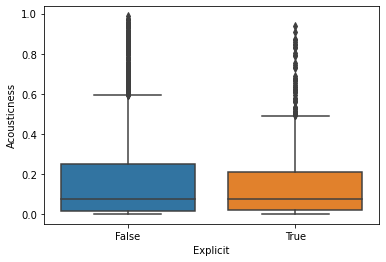

Ttest_indResult(statistic=-3.0749008289251547, pvalue=0.0021212178717900515)
-----------------divide-------------------


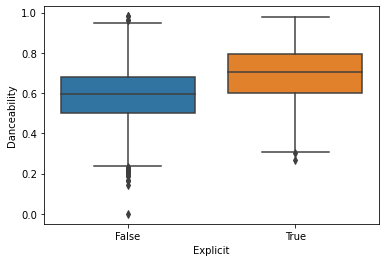

Ttest_indResult(statistic=18.332715906661786, pvalue=6.706142154010043e-72)
-----------------divide-------------------


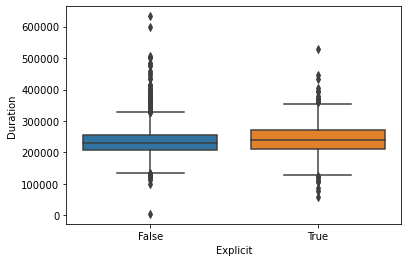

Ttest_indResult(statistic=4.570363247180331, pvalue=5.029119842587493e-06)
-----------------divide-------------------


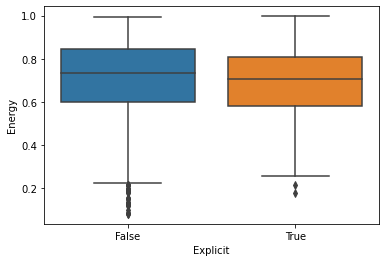

Ttest_indResult(statistic=-2.347594453468972, pvalue=0.018947920450503086)
-----------------divide-------------------


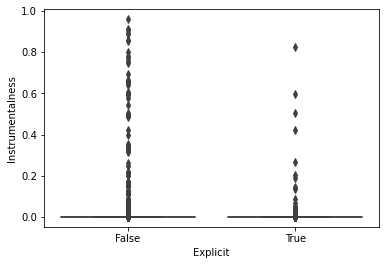

Ttest_indResult(statistic=-2.279524172426864, pvalue=0.022693072590843088)
-----------------divide-------------------


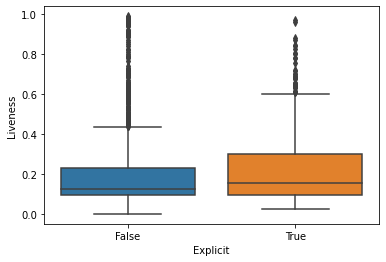

Ttest_indResult(statistic=4.691165815127896, pvalue=2.8155387538357994e-06)
-----------------divide-------------------


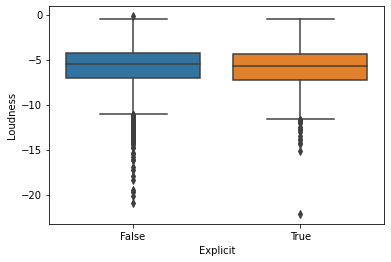

Ttest_indResult(statistic=-1.287885932695421, pvalue=0.1978668718887434)
-----------------divide-------------------


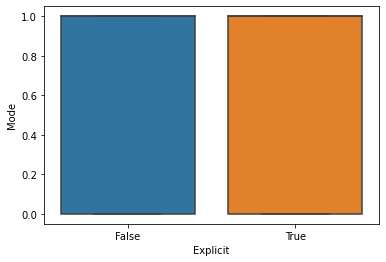

Ttest_indResult(statistic=0.0, pvalue=1.0)
-----------------divide-------------------


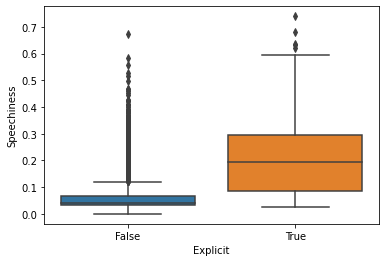

Ttest_indResult(statistic=39.126740778703976, pvalue=3.4894059097832195e-280)
-----------------divide-------------------


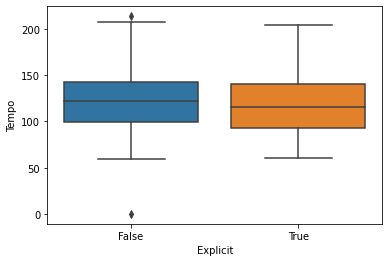

Ttest_indResult(statistic=-4.008831080251262, pvalue=6.22329221961086e-05)
-----------------divide-------------------


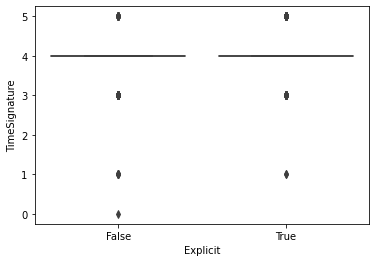

Ttest_indResult(statistic=92.9037564512041, pvalue=0.0)
-----------------divide-------------------


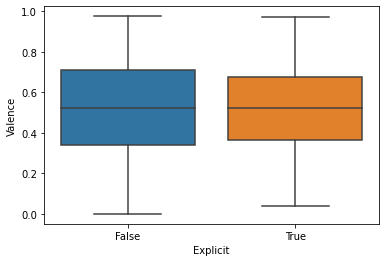

Ttest_indResult(statistic=-0.9793853623630159, pvalue=0.32745416178602593)
-----------------divide-------------------


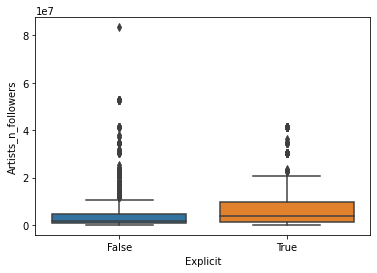

Ttest_indResult(statistic=13.516234119395525, pvalue=1.1606987622731902e-40)
-----------------divide-------------------


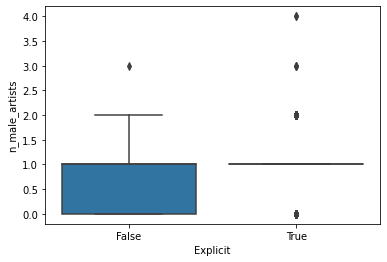

Ttest_indResult(statistic=5.188359512203383, pvalue=2.236404590746123e-07)
-----------------divide-------------------


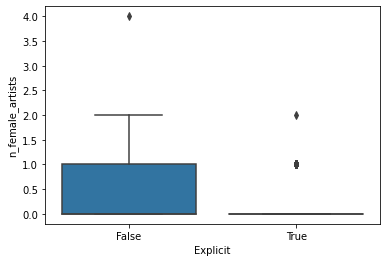

Ttest_indResult(statistic=-9.70602817273204, pvalue=5.214876802490905e-22)
-----------------divide-------------------


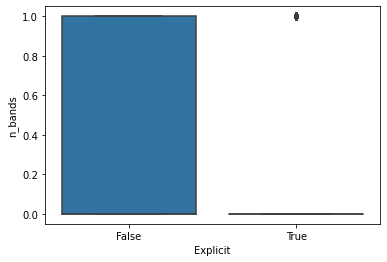

Ttest_indResult(statistic=-10.642200125200608, pvalue=4.531609392227854e-26)
-----------------divide-------------------


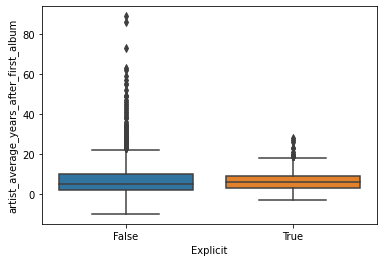

Ttest_indResult(statistic=-3.502589651458043, pvalue=0.00046625490289319775)
-----------------divide-------------------


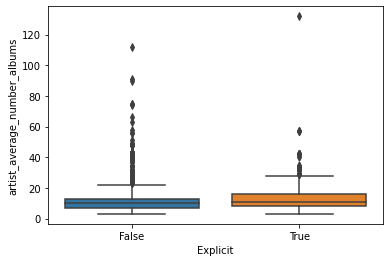

Ttest_indResult(statistic=6.5305464627912055, pvalue=7.452827544119232e-11)
-----------------divide-------------------


In [58]:
from scipy.stats import ttest_ind

for n_att in num_atts:
    sns.boxplot(data=songIntegrate_df, 
                y=n_att,x='Explicit')
    plt.show()
    
    BM = songIntegrate_df.Explicit == True
    print(ttest_ind(songIntegrate_df[BM][n_att],
                    songIntegrate_df[~BM][n_att]))
    print('-----------------divide-------------------')

## The analysis
### Data Visualization approach to finding patterns of top songs

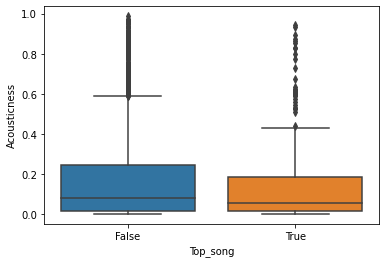

Ttest_indResult(statistic=-3.01729381148025, pvalue=0.0025679314421562906)
{'not Top Song Median': 0.0787, 'Top Song Median': 0.05625}
-----------------divide-------------------


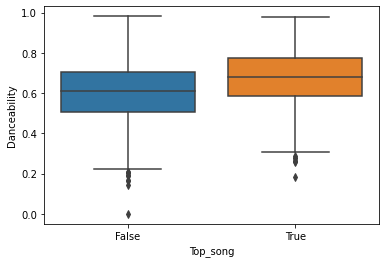

Ttest_indResult(statistic=8.527968438290829, pvalue=2.146261725133671e-17)
{'not Top Song Median': 0.609, 'Top Song Median': 0.683}
-----------------divide-------------------


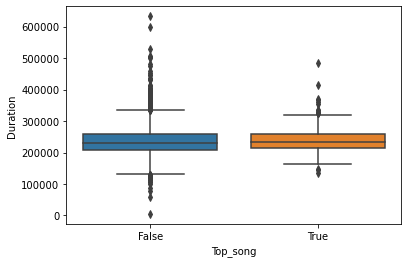

Ttest_indResult(statistic=1.0993290848209791, pvalue=0.27169665868548964)
{'not Top Song Median': 230966.5, 'Top Song Median': 232887.0}
-----------------divide-------------------


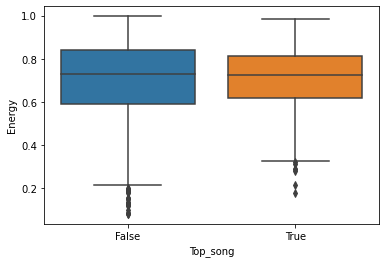

Ttest_indResult(statistic=0.4351080488657919, pvalue=0.6635095861831946)
{'not Top Song Median': 0.7290000000000001, 'Top Song Median': 0.7235}
-----------------divide-------------------


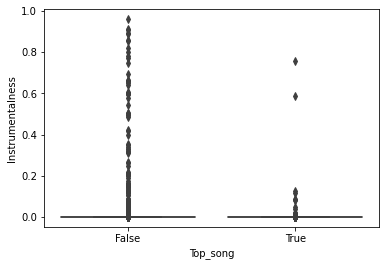

Ttest_indResult(statistic=-1.3317825332485391, pvalue=0.18301436303357835)
{'not Top Song Median': 0.0, 'Top Song Median': 0.0}
-----------------divide-------------------


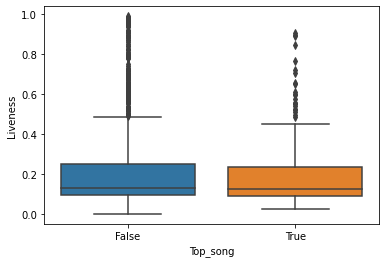

Ttest_indResult(statistic=-1.0828460002627007, pvalue=0.27894792205135727)
{'not Top Song Median': 0.131, 'Top Song Median': 0.125}
-----------------divide-------------------


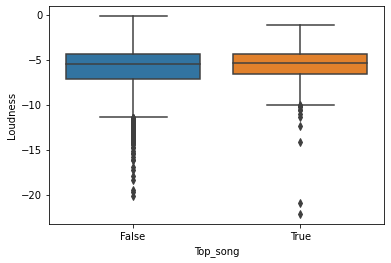

Ttest_indResult(statistic=1.652759876941435, pvalue=0.09846527862627248)
{'not Top Song Median': -5.54, 'Top Song Median': -5.4155}
-----------------divide-------------------


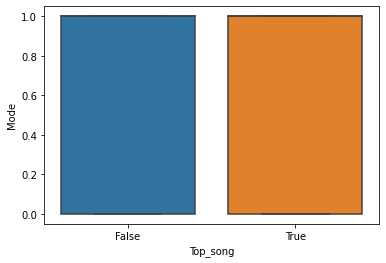

Ttest_indResult(statistic=0.0, pvalue=1.0)
{'not Top Song Median': 1.0, 'Top Song Median': 1.0}
-----------------divide-------------------


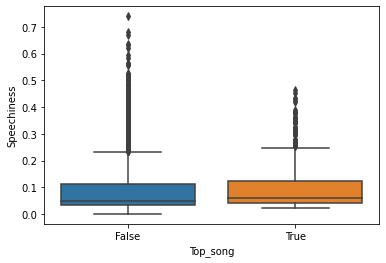

Ttest_indResult(statistic=0.4199394323351342, pvalue=0.6745542829737914)
{'not Top Song Median': 0.0496, 'Top Song Median': 0.059899999999999995}
-----------------divide-------------------


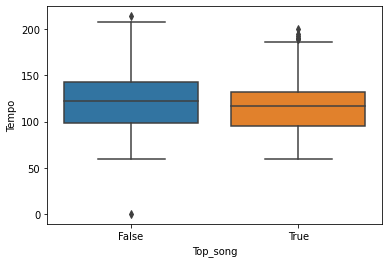

Ttest_indResult(statistic=-3.632251574871429, pvalue=0.0002848008366042354)
{'not Top Song Median': 121.956, 'Top Song Median': 116.737}
-----------------divide-------------------


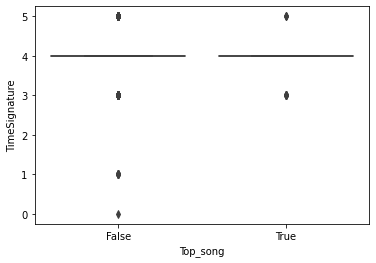

Ttest_indResult(statistic=0.0, pvalue=1.0)
{'not Top Song Median': 4.0, 'Top Song Median': 4.0}
-----------------divide-------------------


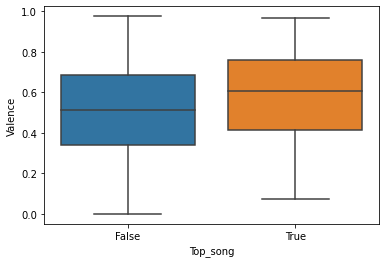

Ttest_indResult(statistic=5.753277167949595, pvalue=9.468938344586826e-09)
{'not Top Song Median': 0.512, 'Top Song Median': 0.605}
-----------------divide-------------------


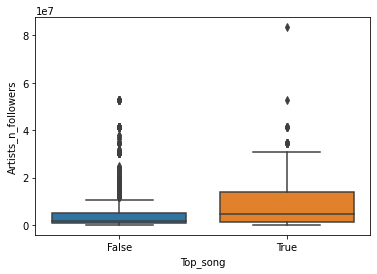

Ttest_indResult(statistic=7.267001925863887, pvalue=4.468061398690322e-13)
{'not Top Song Median': 1781499.0, 'Top Song Median': 4831233.0}
-----------------divide-------------------


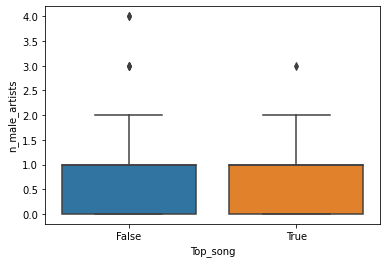

Ttest_indResult(statistic=-3.8052826860133666, pvalue=0.00014395148618651476)
{'not Top Song Median': 1.0, 'Top Song Median': 1.0}
-----------------divide-------------------


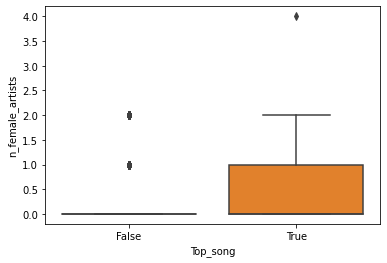

Ttest_indResult(statistic=5.580543169539898, pvalue=2.571193008706459e-08)
{'not Top Song Median': 0.0, 'Top Song Median': 0.0}
-----------------divide-------------------


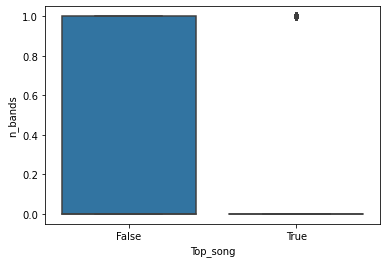

Ttest_indResult(statistic=-2.6646329025499034, pvalue=0.007740966310448071)
{'not Top Song Median': 0.0, 'Top Song Median': 0.0}
-----------------divide-------------------


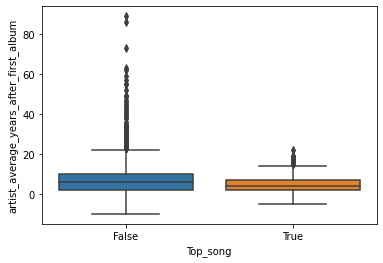

Ttest_indResult(statistic=-6.020511858043881, pvalue=1.909586964131634e-09)
{'not Top Song Median': 6.0, 'Top Song Median': 4.0}
-----------------divide-------------------


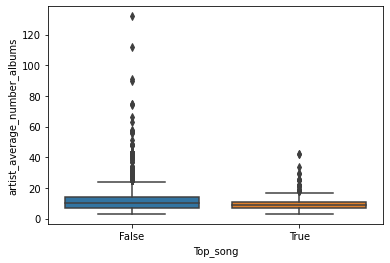

Ttest_indResult(statistic=-4.841448758345063, pvalue=1.342099674659195e-06)
{'not Top Song Median': 10.0, 'Top Song Median': 9.0}
-----------------divide-------------------


In [59]:
from scipy.stats import ttest_ind

for n_att in num_atts:
    sns.boxplot(data=songIntegrate_df, 
                y=n_att,x='Top_song')
    plt.show()
    
    BM = songIntegrate_df.Top_song == True
    print(ttest_ind(songIntegrate_df[BM][n_att],
                    songIntegrate_df[~BM][n_att]))
    dic = {'not Top Song Median': 
           songIntegrate_df[~BM][n_att].median(),
           'Top Song Median': 
           songIntegrate_df[BM][n_att].median()}
    print(dic)
    
    print('-----------------divide-------------------')

In [60]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(
    songIntegrate_df.Top_song, songIntegrate_df.Explicit)

print(contingency_table)
print('p-value = {}'.format(
    chi2_contingency(contingency_table)[1]))

Explicit  False  True 
Top_song              
False      2544    736
True        304     88
p-value = 0.9524873996280296


### Decision Tree approach to finding multivariate patterns of top songs

In [62]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

y = songIntegrate_df.Top_song.replace(
    {True:'Top Song',False:'Not Top Song'})
Xs = songIntegrate_df.drop(columns = [
    'Name','Artists','Top_song','First_date_on_Billboard'])

classTree = DecisionTreeClassifier(criterion= 'entropy', 
                                   max_depth= 10,
                                   min_samples_split= 30,
                                   splitter= 'best')
classTree.fit(Xs, y)

dot_data = export_graphviz(classTree, 
                           out_file=None, 
                           feature_names=Xs.columns,  
                           class_names=['Not Top Song',
                                        'Top Song'], 
                           filled=True,
                           rounded=True, 
                           special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render(filename='TopSongDT')

'TopSongDT.pdf'